## Notebook for data exploration
In this notebook, some insightful data exploration has been performed to know some basic characteristic of the data.  
In the fuerther cells, we will peek into the data for inspection.  

In [47]:
# Imports
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import re

In [3]:
# Defining functions used for analysis
def show_augmentations_for_image(original_image_path: str, augmented_root: str, sample: int = 1) -> None:
    try:
        original_image = Image.open(original_image_path)
    except Exception as e:
        print(f"Error loading original image {original_image_path}: {e}")
        return

    base_filename = os.path.splitext(os.path.basename(original_image_path))[0]
    
    augmented_images = []
    for root, _, files in os.walk(augmented_root):
        for file in files:
            if base_filename in file:
                augmented_images.append(os.path.join(root, file))
    
    if not augmented_images:
        print("No augmentations found for this image.")
        return

    if len(augmented_images) > sample:
        augmented_images = random.sample(augmented_images, sample)

    total_images = 1 + len(augmented_images)
    plt.figure(figsize=(4 * total_images, 4))
    
    plt.subplot(1, total_images, 1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis("off")
    
    for idx, aug_path in enumerate(augmented_images, start=2):
        try:
            img = Image.open(aug_path)
        except Exception as e:
            print(f"Error loading augmented image {aug_path}: {e}")
            continue

        filename = os.path.basename(aug_path)
        parts = filename.split('_')
        if len(parts) >= 3:
            aug_type = parts[1]
        else:
            aug_type = "unknown"
        plt.subplot(1, total_images, idx)
        plt.imshow(img)
        plt.title(aug_type)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [12]:
def statistical_summary(main_folder: str) -> None:
    categories = [d for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]
    
    stats = {}
    for cat in categories:
        cat_path = os.path.join(main_folder, cat)
        image_files = [os.path.join(cat_path, f) for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.npy'))]
        count = len(image_files)
        widths, heights = [], []
        for f in image_files:
            try:
                if f.lower().endswith('.npy'):
                    arr = np.load(f)
                    h, w = arr.shape[0], arr.shape[1]
                else:
                    with Image.open(f) as img:
                        w, h = img.size
                widths.append(w)
                heights.append(h)
            except Exception as e:
                print(f"Error processing image {f}: {e}")
        avg_width = np.mean(widths) if widths else 0
        avg_height = np.mean(heights) if heights else 0
        stats[cat] = {"count": count, "avg_width": avg_width, "avg_height": avg_height}
    
    for cat, data in stats.items():
        print(f"Category: {cat} -- Count: {data['count']}, Avg Width: {data['avg_width']:.1f}, Avg Height: {data['avg_height']:.1f}")
    
    cats = list(stats.keys())
    counts = [stats[cat]["count"] for cat in cats]
    
    plt.figure(figsize=(10, 6))
    plt.bar(cats, counts, color="skyblue")
    plt.xlabel("Category")
    plt.ylabel("Number of Images")
    plt.title("Image Count per Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [49]:
def plot_augmentation_distribution(augmented_folder: str) -> None:
    aug_counts = defaultdict(int)
    
    for root, _, files in os.walk(augmented_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.npy')):
                parts = file.split('_')
                if len(parts) >= 3:
                    aug_type = parts[1]
                    aug_counts[aug_type] += 1
    
    if not aug_counts:
        print("No augmentation information found in the file names.")
        return
    
    labels = list(aug_counts.keys())
    sizes = [aug_counts[label] for label in labels]
    
    fig = plt.figure(figsize=(8, 8), facecolor='white')
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Augmentation Distribution")
    plt.axis('equal')
    fig.patch.set_facecolor('white')
    plt.show()


In [17]:
def show_original_vs_augmented(augmented_image_path: str, original_root: str) -> None:
    aug_filename = os.path.basename(augmented_image_path)
    
    match = re.search(r"(n\d{8}_[0-9]+\.png)", aug_filename)
    if match:
        original_filename = match.group(1)
    else:
        print("Could not extract the original filename from the augmented filename.")
        return

    original_image_path = None
    for root, _, files in os.walk(original_root):
        for file in files:
            if file == original_filename:
                original_image_path = os.path.join(root, file)
                break
        if original_image_path:
            break

    if not original_image_path:
        print(f"Original image {original_filename} not found in {original_root}.")
        return

    try:
        original_img = Image.open(original_image_path)
    except Exception as e:
        print(f"Error loading original image: {e}")
        return

    try:
        augmented_img = Image.open(augmented_image_path)
    except Exception as e:
        print(f"Error loading augmented image: {e}")
        return

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_img)
    plt.title("Augmented")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

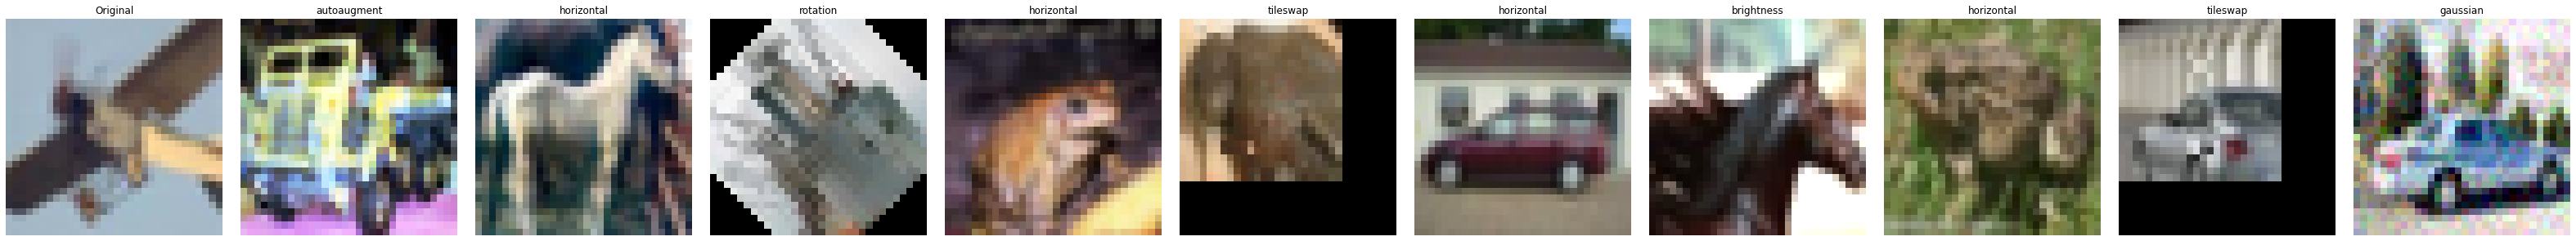

In [ ]:
original_image_path = "Data/Data_raw/train/airplane/cifar10-train-439.png" 
augmented_root = "Data/Data_augmented"
show_augmentations_for_image(original_image_path, augmented_root, sample=10)

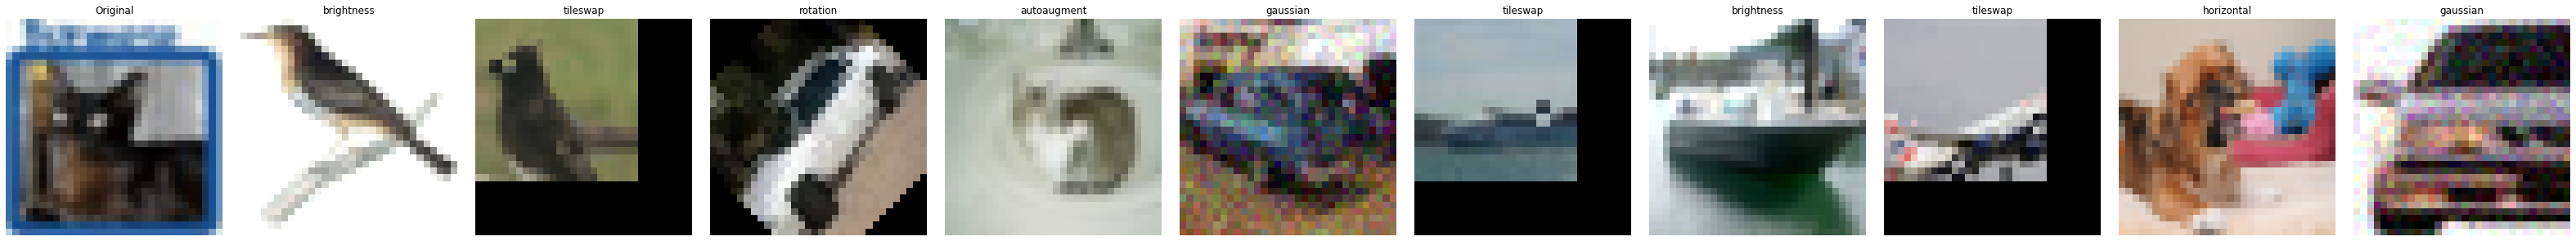

In [10]:
original_image_path = "Data/Data_raw/train/cat/cifar10-train-59.png" 
augmented_root = "Data/Data_augmented"
show_augmentations_for_image(original_image_path, augmented_root, sample=10)

## Inspecting the transformations
In the analysis below we will be checking two comparisons of the given augmentation and how they compare to the original.

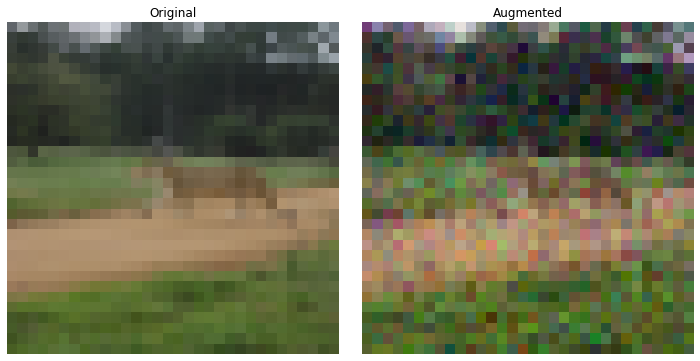

In [ ]:
# Gaussian noise example I
aug_img_path = "Data/Data_augmented/train/cat/aug_gaussian_gaussian_noise_n02127808_9243.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

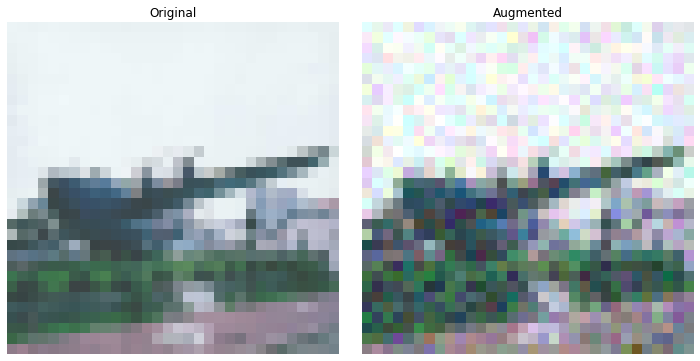

In [22]:
# Gaussian noise example II
aug_img_path = "Data/Data_augmented/test/airplane/aug_gaussian_gaussian_noise_n03373611_3208.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

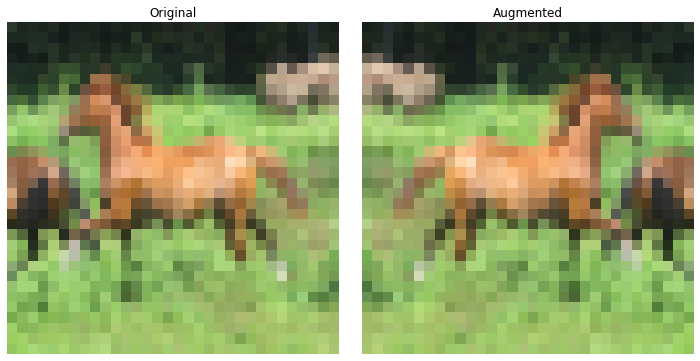

In [25]:
# Horizontal flip example I
aug_img_path = "Data/Data_augmented/test/horse/aug_horizontal_horizontal_flip_n02386224_6863.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

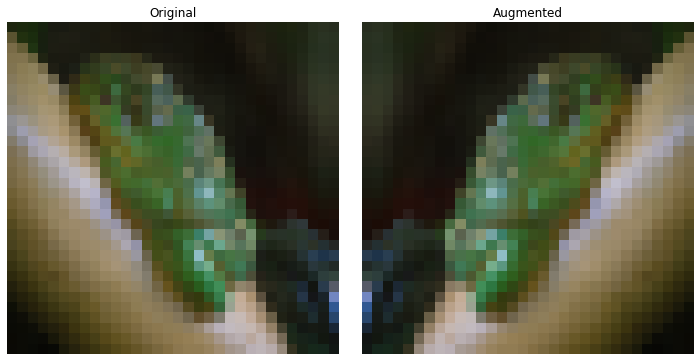

In [23]:
# Horizontal flip example II
aug_img_path = "Data/Data_augmented/test/frog/aug_horizontal_horizontal_flip_n01650167_1806.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

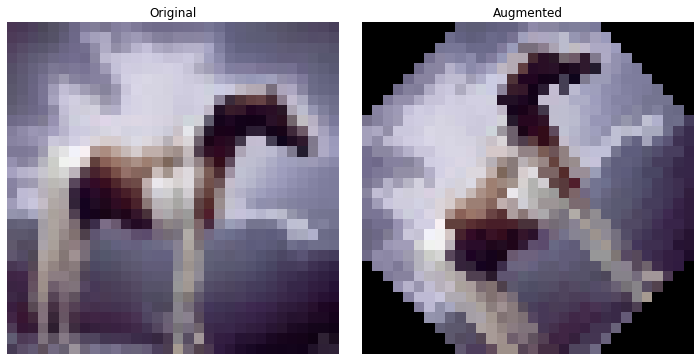

In [27]:
# Rotation example I
aug_img_path = "Data/Data_augmented/test/horse/aug_rotation_rotation_n02389261_4525.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

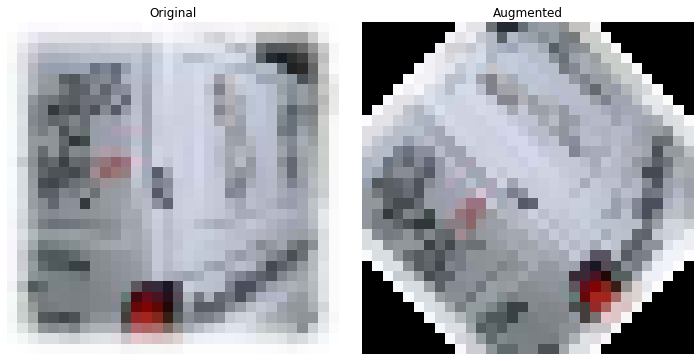

In [29]:
# Rotation example II
aug_img_path = "Data/Data_augmented/test/truck/aug_rotation_rotation_n03173929_12429.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

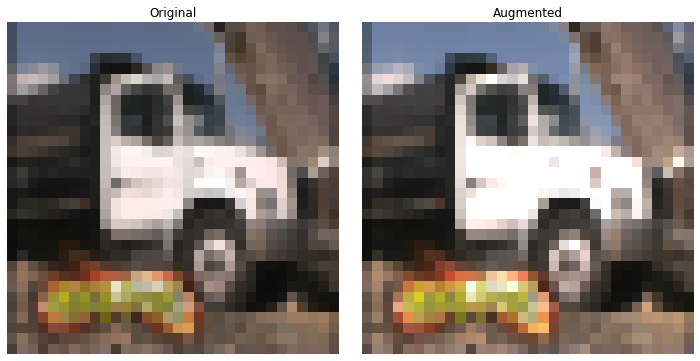

In [30]:
# Brightness example I
aug_img_path = "Data/Data_augmented/test/truck/aug_brightness_brightness_n03256166_827.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

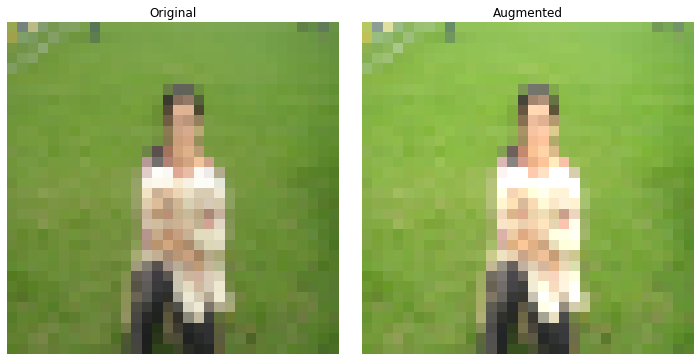

In [31]:
# Brightness example I
aug_img_path = "Data/Data_augmented/test/dog/aug_brightness_brightness_n02113624_3088.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

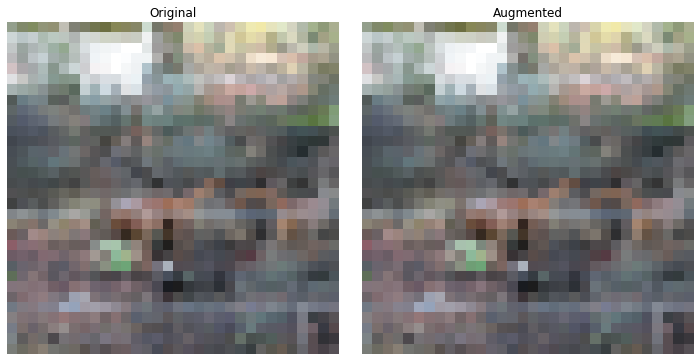

In [32]:
# Autoaugment example I
aug_img_path = "Data/Data_augmented/test/dog/aug_autoaugment_autoaugment_n02115641_649.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

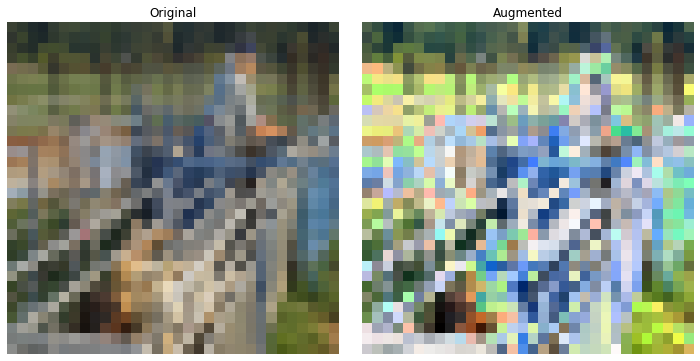

In [ ]:
# Autoaugment example II
aug_img_path = "Data/Data_augmented/test/deer/aug_autoaugment_autoaugment_n02416519_3979.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

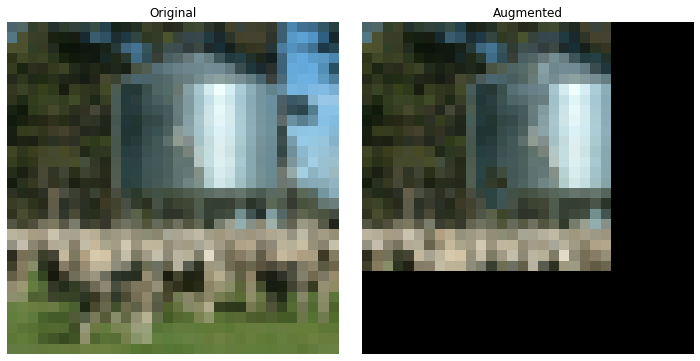

In [35]:
# Tileswap example II
aug_img_path = "Data/Data_augmented/test/deer/aug_tileswap_tileswap_n02411705_1466.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

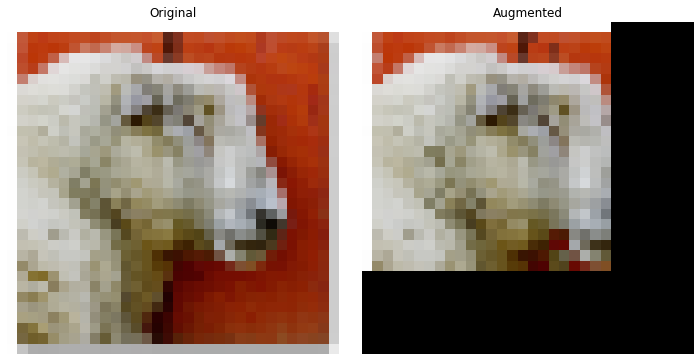

In [36]:
# Tileswap example II
aug_img_path = "Data/Data_augmented/test/deer/aug_tileswap_tileswap_n02411705_1424.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

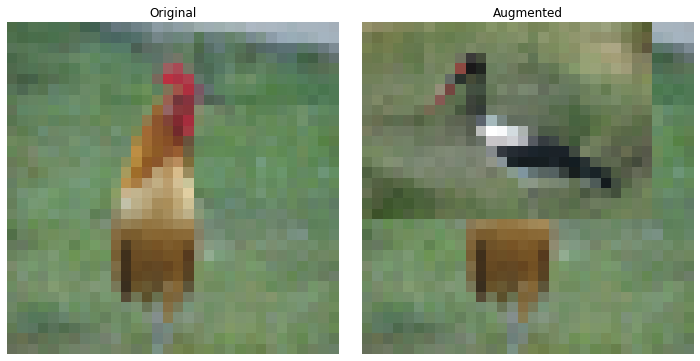

In [38]:
# Cutmix example I
aug_img_path = "Data/Data_augmented/test/bird/aug_cutmix_cutmix_n01792158_1868.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

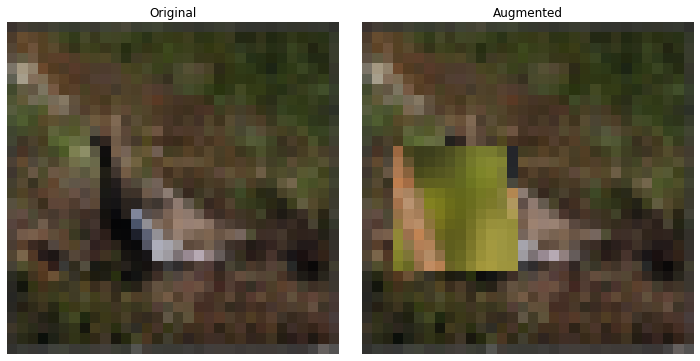

In [39]:
# Cutmix example II
aug_img_path = "Data/Data_augmented/test/bird/aug_cutmix_cutmix_n01796340_5790.png"
original_root = "Data/Data_raw"
show_original_vs_augmented(aug_img_path, original_root)

## Some statistical visualizations
Below we demonstrate some statistical visualizations on the data to show elemental characteristics.

Category: airplane -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: automobile -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: bird -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: cat -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: deer -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: dog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: frog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: horse -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: ship -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: truck -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0


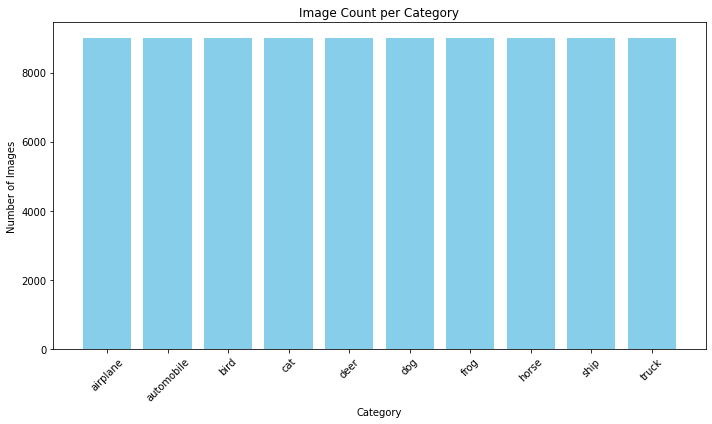

In [41]:
statistical_summary("Data/Data_raw/test")

Category: airplane -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: automobile -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: bird -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: cat -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: deer -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: dog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: frog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: horse -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: ship -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: truck -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0


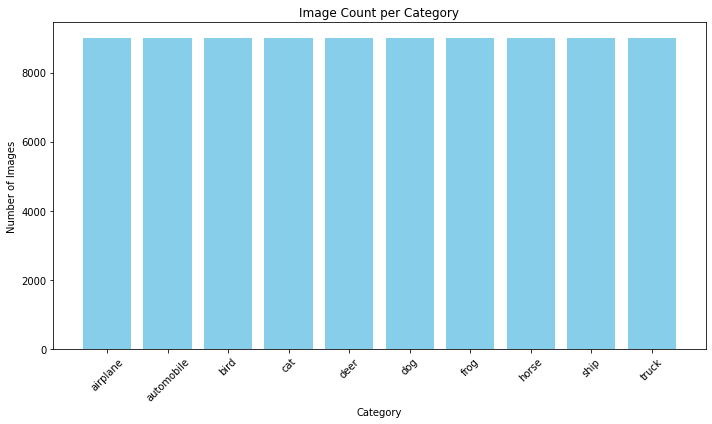

In [42]:
statistical_summary("Data/Data_raw/train")

Category: airplane -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: automobile -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: bird -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: cat -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: deer -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: dog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: frog -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: horse -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: ship -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0
Category: truck -- Count: 9000, Avg Width: 32.0, Avg Height: 32.0


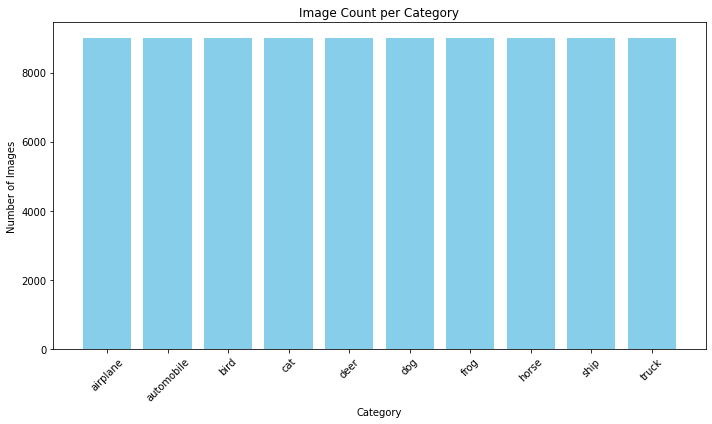

In [43]:
statistical_summary("Data/Data_raw/valid")

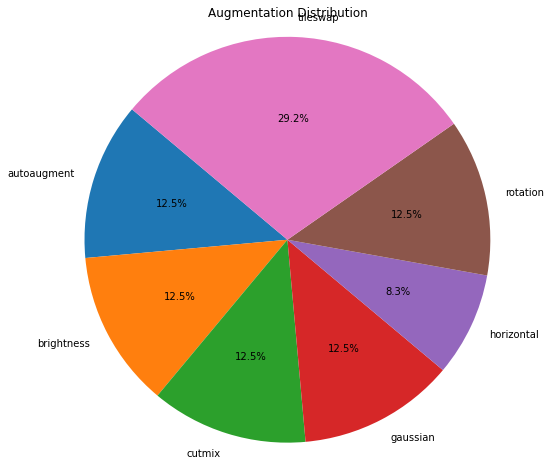

In [ ]:
# Plotted distribution of all of the augmentations
plot_augmentation_distribution("Data/Data_augmented")